<a href="https://colab.research.google.com/github/Pixel-33/pythonGestFormProject/blob/master/GestForm_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Test d'entretien "GestForm" - version notebook Google Colab**

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Génération de la liste d'entiers aléatoires
# Je choisi d'imposer le nombre d'entiers à 10000
my_list = np.random.randint(-1000, 1001, 10000).tolist()
my_list

In [66]:
# Construction d'un DataFrame avec 4 colonnes
# 'Data'              -> liste des nombres aléatoires
# 'Result'            -> résultat produit par le programme (Geste, Forme, Gestform, sinon n)
# 'Divisible_by_3'    -> boolean pour dire si divisible par 3
# 'Divisible_by_5'    -> boolean pour dire si divisible par 5

my_columns = ['Data']
df = pd.DataFrame(my_list, columns=my_columns)
df['Result'] = np.NAN
df['Divisible_by_3'] = df['Data'] % 3 == 0
df['Divisible_by_5'] = df['Data'] % 5 == 0
df

,Data,Result,Divisible_by_3,Divisible_by_5
0,920,NaN,False,True
1,682,NaN,False,False
2,-761,NaN,False,False
3,555,NaN,True,True
4,88,NaN,False,False
...,...,...,...,...
9995,322,NaN,False,False
9996,-335,NaN,False,True
9997,-873,NaN,True,False
9998,-695,NaN,False,True


In [67]:
# Cette fonction va renvoyer (Geste, Forme, Gestform, sinon n) en fonction des conditions de l'exercice
def getResult(df):
    if df['Divisible_by_3'] and df['Divisible_by_5']:
        result = 'Gestform'
    elif df['Divisible_by_3']:
        result = 'Geste'
    elif df['Divisible_by_5']:
        result = 'Forme'
    else:
        result = df['Data']
    return result

**Résultat demandé par le test GestForm**

In [68]:
# Remplissage de la colonne 'Result' avec (Geste, Forme, Gestform, sinon n)
# La fonction getResult va être appliquée à toutes les lignes du DataFrame
df['Result'] = df.apply(getResult, axis=1)
df

,Data,Result,Divisible_by_3,Divisible_by_5
0,920,Forme,False,True
1,682,682,False,False
2,-761,-761,False,False
3,555,Gestform,True,True
4,88,88,False,False
...,...,...,...,...
9995,322,322,False,False
9996,-335,Forme,False,True
9997,-873,Geste,True,False
9998,-695,Forme,False,True


**Pour aller plus loin : je vais m'intéresser aux occurences dans la colonne 'Result'**

In [69]:
# Ce code va me permettre de remplacer tous les entiers de la colonne 'Result' par la string 'n'
# Ceci dans le but de pouvoir comptabiliser les 'n' de la colonne 'Result'
gestform = ['Geste', 'Forme', 'Gestform']
df.Result[~df.Result.isin(gestform)] = 'n'
df

<ipython-input-69-f2da5eaef3d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Result[~df.Result.isin(gestform)] = 'n'


,Data,Result,Divisible_by_3,Divisible_by_5
0,920,Forme,False,True
1,682,n,False,False
2,-761,n,False,False
3,555,Gestform,True,True
4,88,n,False,False
...,...,...,...,...
9995,322,n,False,False
9996,-335,Forme,False,True
9997,-873,Geste,True,False
9998,-695,Forme,False,True


In [70]:
# Ce code calcule les occurences de 'n' 'Geste' 'Forme' 'Gestform' en les classant par ordre décroissant
occurences = df['Result'].value_counts()
occurences

n           5329
Geste       2682
Forme       1341
Gestform     648
Name: Result, dtype: int64

-> on peut dire que l'ordre décroissant des occurences est logique.  
La chance d'avoir un entier divisible par 3 et 5 est plus faible que celle d'obtenir un entier divisible par 5. Idem, plus de chances d'avoir un entier divisible par 3 qu'un entier divisible par 5. Et l'occurence la plus forte est représentée pour tous les entiers qui ne rentrent pas dans les 3 cas de figure recherchés ('Geste' 'Forme' 'Gestform').

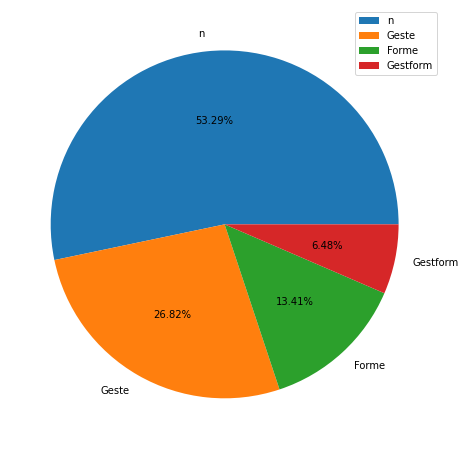

In [71]:
# Affichage d'un graphique camembert avec les pourcentages d'occurences de 'n' 'Geste' 'Forme' 'Gestform'
plt.figure(figsize = (8, 8))
labels = ['n', 'Geste', 'Forme', 'Gestform']
plt.pie(occurences, labels =labels, autopct = lambda x: str(round(x, 2)) + '%' )
plt.legend()
plt.show()